In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [8]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [1]:
#1. 데이터 프레임 생성

In [84]:
crude_oil = pd.read_csv('data/Crude Oil.csv')

In [87]:
XOM_price = pd.read_csv('data/XOM_price.csv')

In [89]:
price = list(XOM_price.Date.unique())

In [90]:
oil = list(crude_oil.Date.unique())

In [6]:
crude_oil.loc[crude_oil['Date']=='2013-07-03']

,Date,Open,High,Low,Close,Adj Close,Volume


In [7]:
XOM_price.loc[XOM_price['Date'] == '2013-12-24']

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
1002,1002,2013-12-24,98.330002,99.440002,98.330002,99.220001,71.38253,4168300


In [11]:
# 1.1 결측치 확인

In [91]:
minus= list(set(price)-set(oil))

In [92]:
pd.DataFrame(minus).sort_values(0).values

array([['2007-07-03'],
       ['2007-11-23'],
       ['2007-12-24'],
       ['2008-07-03'],
       ['2008-11-28'],
       ['2008-12-24'],
       ['2008-12-31'],
       ['2009-11-27'],
       ['2009-12-24'],
       ['2010-11-26'],
       ['2011-11-25'],
       ['2012-07-03'],
       ['2012-11-23'],
       ['2012-12-24'],
       ['2013-07-03'],
       ['2013-11-29'],
       ['2013-12-24'],
       ['2014-07-03'],
       ['2014-11-28'],
       ['2014-12-24'],
       ['2016-10-10'],
       ['2016-11-11'],
       ['2017-07-03'],
       ['2017-11-24'],
       ['2018-07-03'],
       ['2018-11-23'],
       ['2018-12-24'],
       ['2019-07-03'],
       ['2019-11-29'],
       ['2019-12-24'],
       ['2020-11-27'],
       ['2020-12-24']], dtype=object)

In [12]:
# 원유 거래시장과 주식거래시장과의 공휴일 차이로 인한 결측치 발생 -> Merge 하면서 23행 삭제

In [10]:
type(minus)

list

In [93]:
XOM_crude=pd.merge(XOM_price,crude_oil,on = 'Date',suffixes=('_XOM','_crude_oil'))

In [13]:
# 1.2년도 파생변수, 년월 파생변수 생성

In [97]:
XOM_crude['Date'].str.slice(0,4)

0       2007
1       2007
2       2007
3       2007
4       2007
        ... 
3611    2021
3612    2021
3613    2021
3614    2021
3615    2021
Name: Date, Length: 3616, dtype: object

In [98]:
XOM_crude['Date'].str.slice(0,7)

0       2007-01
1       2007-01
2       2007-01
3       2007-01
4       2007-01
         ...   
3611    2021-06
3612    2021-06
3613    2021-06
3614    2021-06
3615    2021-06
Name: Date, Length: 3616, dtype: object

In [99]:
XOM_crude['Month'] = XOM_crude['Date'].str.slice(0,7)

In [100]:
XOM_crude['year'] = XOM_crude['Date'].str.slice(0,4)

In [21]:
XOM_crude.columns

Index(['Unnamed: 0', 'Date', 'Open_x', 'High_x', 'Low_x', 'Close_x',
       'Adj Close_x', 'Volume_x', 'Open_y', 'High_y', 'Low_y', 'Close_y',
       'Adj Close_y', 'Volume_y', 'Month', 'year'],
      dtype='object')

In [2]:
#2. 생성한 데이터 확인

In [14]:
XOM_crude.head()

,Unnamed: 0,Date,Open_XOM,High_XOM,Low_XOM,Close_XOM,Adj Close_XOM,Volume_XOM,Open_crude_oil,High_crude_oil,Low_crude_oil,Close_crude_oil,Adj Close_crude_oil,Volume_crude_oil,Month,year,party,party_value
0,0,2007-01-03,76.260002,76.269997,73.510002,74.110001,45.389812,30510700,60.950001,60.970001,57.720001,58.320000,58.320000,248547,2007-01,2007,공화당,1
1,1,2007-01-04,73.849998,73.900002,72.209999,72.720001,44.538490,31046600,58.349998,58.580002,55.389999,55.590000,55.590000,324010,2007-01,2007,공화당,1
2,2,2007-01-05,72.449997,73.379997,72.220001,73.239998,44.856956,24671500,55.410000,56.400002,54.900002,56.310001,56.310001,250130,2007-01,2007,공화당,1
3,3,2007-01-08,73.879997,74.250000,71.849998,72.650002,44.495609,25981900,56.240002,57.720001,55.099998,56.090000,56.090000,298727,2007-01,2007,공화당,1
4,4,2007-01-09,71.849998,72.839996,71.440002,72.089996,44.152622,27039900,56.119999,56.200001,53.880001,55.639999,55.639999,333330,2007-01,2007,공화당,1


In [15]:
XOM_crude[['Close_XOM','Close_crude_oil']].describe()

,Close_XOM,Close_crude_oil
count,3616.000000,3616.000000
mean,78.123963,71.002362
std,13.763188,23.592483
min,31.450001,-37.630001
25%,71.487499,51.470001
50%,81.215000,67.759998
75%,87.230003,91.972502
max,104.379997,145.179993


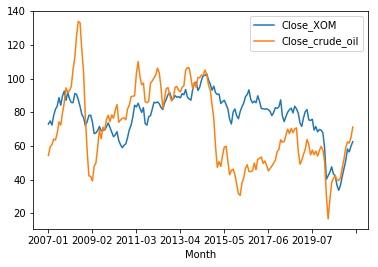

In [103]:
XOM_crude.groupby('Month').mean()[['Close_XOM','Close_crude_oil']].plot.line()

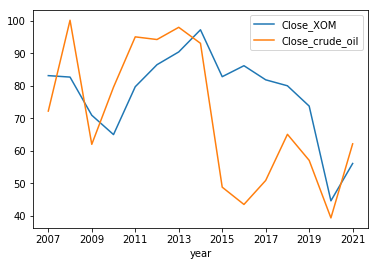

In [104]:
XOM_crude.groupby('year').mean()[['Close_XOM','Close_crude_oil']].plot.line()

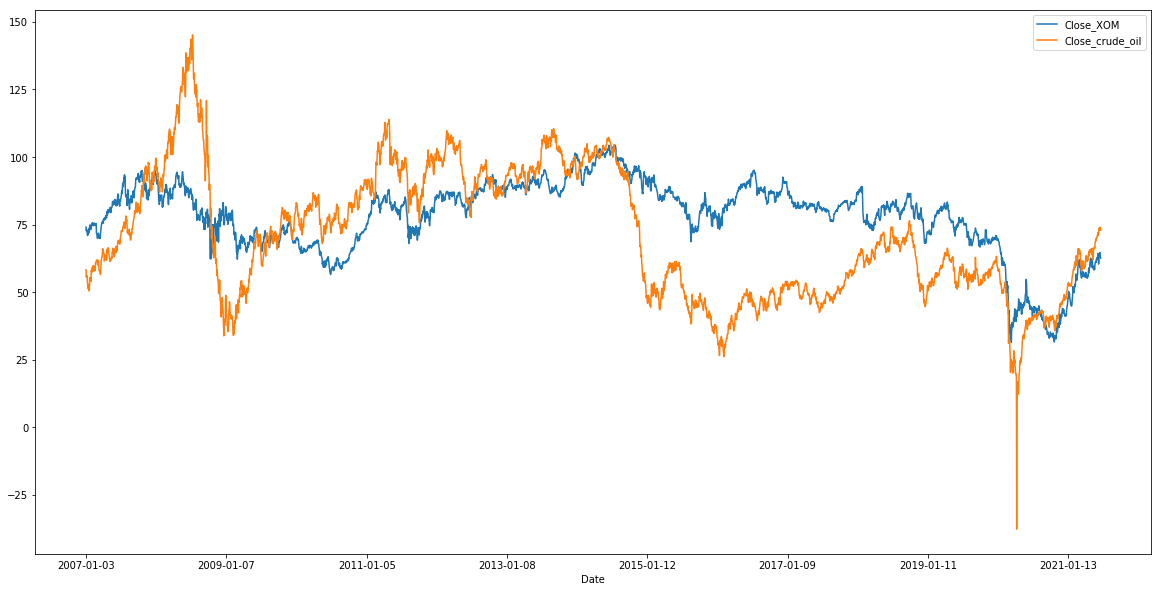

In [106]:
XOM_crude[['Date','Close_XOM','Close_crude_oil']].plot.line(x='Date',figsize = (20,10))

In [110]:
XOM_crude['year']=XOM_crude['year'].astype('int64')

In [157]:
XOM_crude[['Close_XOM']].min()

Close_XOM    31.450001
dtype: float64

In [156]:
XOM_crude[['Close_XOM']].max()

Close_XOM    104.379997
dtype: float64

In [159]:
X_lin = np.linspace(XOM_crude[['Close_XOM']].min(),XOM_crude[['Close_XOM']].max())

In [163]:
XOM_crude['Close_XOM']

0       74.110001
1       72.720001
2       73.239998
3       72.650002
4       72.089996
          ...    
3611    64.260002
3612    64.519997
3613    64.660004
3614    63.009998
3615    62.619999
Name: Close_XOM, Length: 3616, dtype: float64

In [18]:
XOM_crude.loc[XOM_crude['Close_XOM']==XOM_crude['Close_XOM'].min()]

,Unnamed: 0,Date,Open_XOM,High_XOM,Low_XOM,Close_XOM,Adj Close_XOM,Volume_XOM,Open_crude_oil,High_crude_oil,Low_crude_oil,Close_crude_oil,Adj Close_crude_oil,Volume_crude_oil,Month,year,party,party_value
3297,3297,2020-03-23,32.529999,32.700001,30.110001,31.450001,28.631767,56952500,22.52,24.07,20.799999,23.360001,23.360001,852951,2020-03,2020,공화당,1


In [16]:
#3. 데이터 변수별 연관성 분석

In [19]:
#3.1 통계적 수치확인

In [125]:
np.cov(np.array(XOM_crude['Close_XOM']),XOM_crude['Close_crude_oil']))

158.5555103579405

In [126]:
np.corrcoef(np.array(XOM_crude['Close_XOM']),XOM_crude['Close_crude_oil'])[0,1]

0.48830217227784584

In [137]:
stats.pearsonr(XOM_crude['Close_crude_oil'],np.array(XOM_crude['Close_XOM']))

(0.48830217227784584, 4.7229943679422535e-216)

In [136]:
stats.pearsonr(np.array(XOM_crude['Close_XOM']),XOM_crude['Close_crude_oil'])

(0.48830217227784584, 4.7229943679422535e-216)

In [176]:
X_lin = np.linspace(XOM_crude[['Close_XOM']].loc[XOM_crude['party']=='공화당'].min(),XOM_crude[['Close_XOM']].max())

In [183]:
XOM_crude.loc[XOM_crude['party']=='공화당'].loc[XOM_crude['Close_XOM']<32]

,Date,Open_XOM,High_XOM,Low_XOM,Close_XOM,Adj Close_XOM,Volume_XOM,Open_crude_oil,High_crude_oil,Low_crude_oil,Close_crude_oil,Adj Close_crude_oil,Volume_crude_oil,Month,year,party,party_value
3297,2020-03-23,32.529999,32.700001,30.110001,31.450001,28.631767,56952500,22.520000,24.070000,20.799999,23.360001,23.360001,852951,2020-03,2020,공화당,1
3450,2020-10-28,32.099998,32.380001,31.520000,31.570000,29.876278,42136400,38.970001,39.009998,36.970001,37.389999,37.389999,489954,2020-10,2020,공화당,1


In [132]:
np.corrcoef(np.array(XOM_crude['Close_XOM'].loc[XOM_crude['party']=='공화당']),XOM_crude['Close_crude_oil'].loc[XOM_crude['party']=='공화당'])[0,1]

0.6079354999804675

In [133]:
stats.pearsonr(np.array(XOM_crude['Close_XOM'].loc[XOM_crude['party']=='공화당']),XOM_crude['Close_crude_oil'].loc[XOM_crude['party']=='공화당'])

(0.6079354999804676, 1.1265081995494256e-151)

In [187]:
X_lin = np.linspace(XOM_crude[['Close_XOM']].loc[XOM_crude['party']=='민주당'].min(),XOM_crude[['Close_XOM']].max())

In [193]:
XOM_crude.loc[XOM_crude['party']=='민주당'].loc[XOM_crude['Close_XOM']<42.5]

,Date,Open_XOM,High_XOM,Low_XOM,Close_XOM,Adj Close_XOM,Volume_XOM,Open_crude_oil,High_crude_oil,Low_crude_oil,Close_crude_oil,Adj Close_crude_oil,Volume_crude_oil,Month,year,party,party_value
3493,2021-01-04,41.450001,42.25,41.0,41.5,40.221066,27764700,48.400002,49.830002,47.18,47.619999,47.619999,528525,2021-01,2021,민주당,0


In [21]:
#3.2 시각적 그래프확인

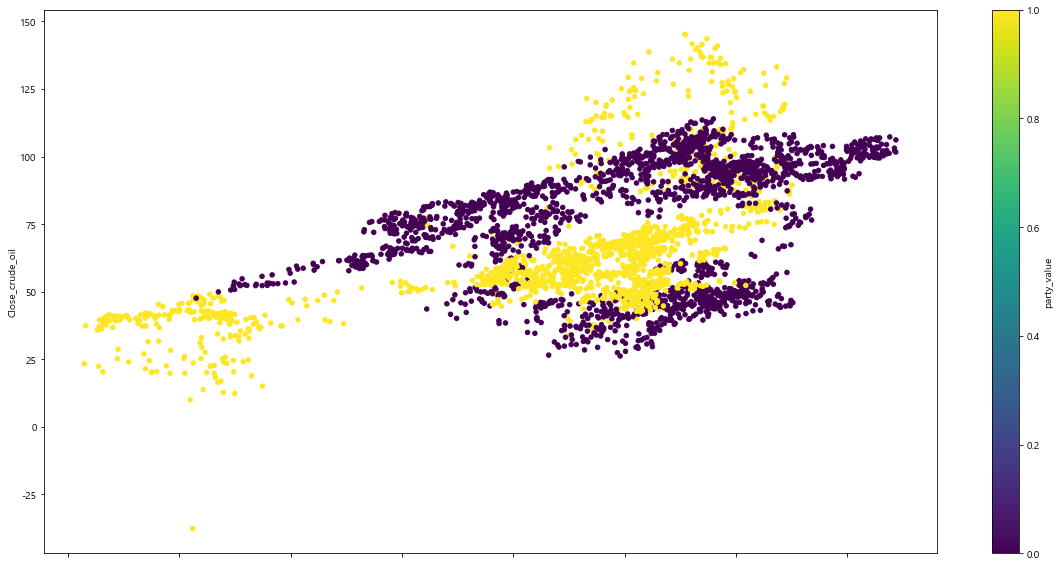

In [10]:
XOM_crude[['Close_XOM','Close_crude_oil','party_value']].plot.scatter(c = 'party_value',x='Close_XOM',y='Close_crude_oil',colormap='viridis',figsize = (20,10))

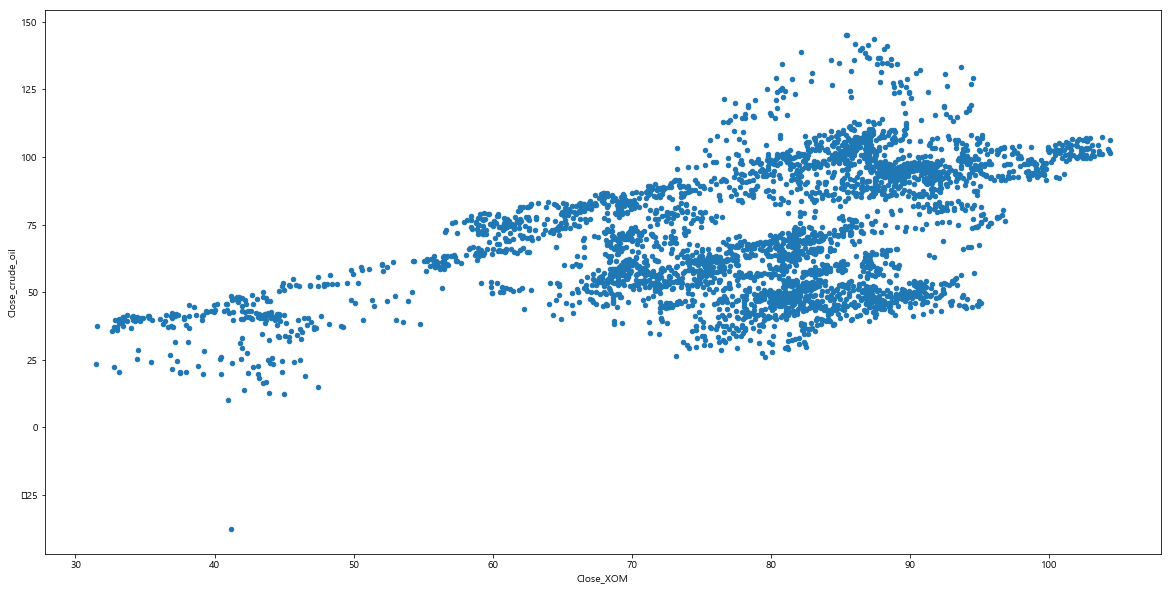

In [5]:
XOM_crude[['Close_XOM','Close_crude_oil','party_value']].plot.scatter(x='Close_XOM',y='Close_crude_oil',colormap='viridis',figsize = (20,10))

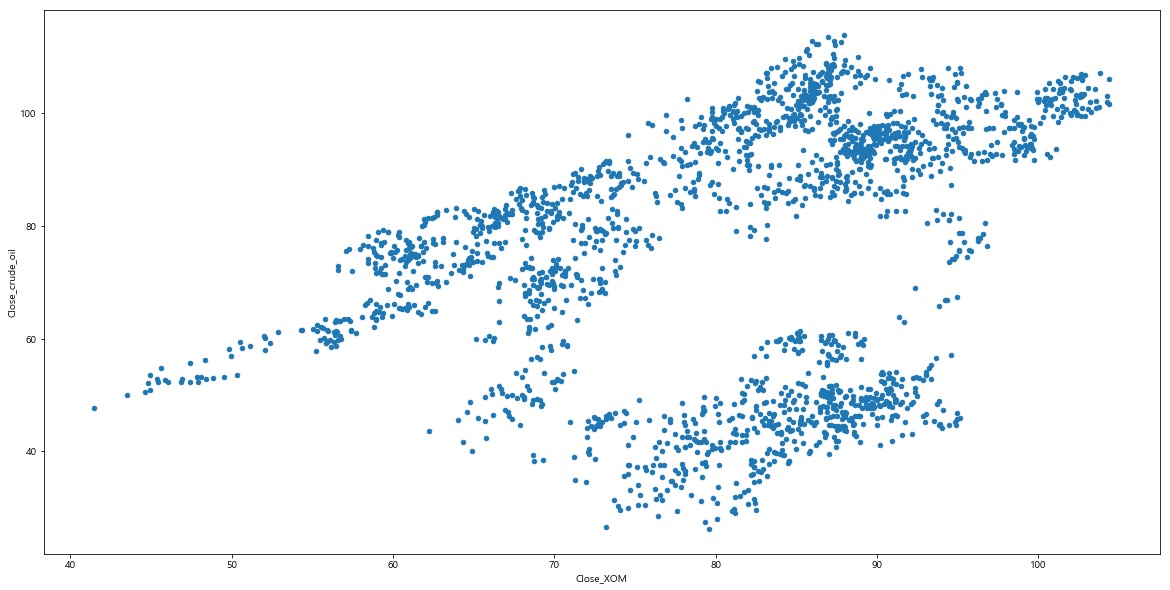

In [4]:
XOM_crude[['Close_XOM','Close_crude_oil','party_value']].loc[XOM_crude['party']=='민주당'].plot.scatter(x='Close_XOM',y='Close_crude_oil',colormap='viridis',figsize = (20,10))

In [27]:
#4. 미국 집권정당별 차이 확인

In [28]:
#4.1 미국 집권정당 데이터 생성

In [80]:
president = pd.read_csv('data/president.csv')

In [81]:
president

,Unnamed: 0,name,start,end,party,before
0,1,조지 W. 부시,2001,2005,공화당,텍사스 주지사
1,2,조지 W. 부시,2005,2009,공화당,텍사스 주지사
2,3,버락 오바마,2009,2013,민주당,상원의원
3,4,버락 오바마,2013,2017,민주당,상원의원
4,5,도널드 트럼프,2017,2021,공화당,기업가
5,6,조 바이든,2021,2025,민주당,부통령


In [29]:
XOM_crude['party'] = np.where(XOM_crude['year']<2009,'공화당',np.where(XOM_crude['year']<2017,'민주당',np.where(XOM_crude['year']<2021,'공화당','민주당')))

In [31]:
#4.2 미국 집권정당 파생변수생성

In [30]:
XOM_crude['party_value']= np.where(XOM_crude['party']=='공화당',1,0)

In [ ]:
#4.3 미국 집권정당별 데이터 파악

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C1510D4E0>,
      dtype=object)

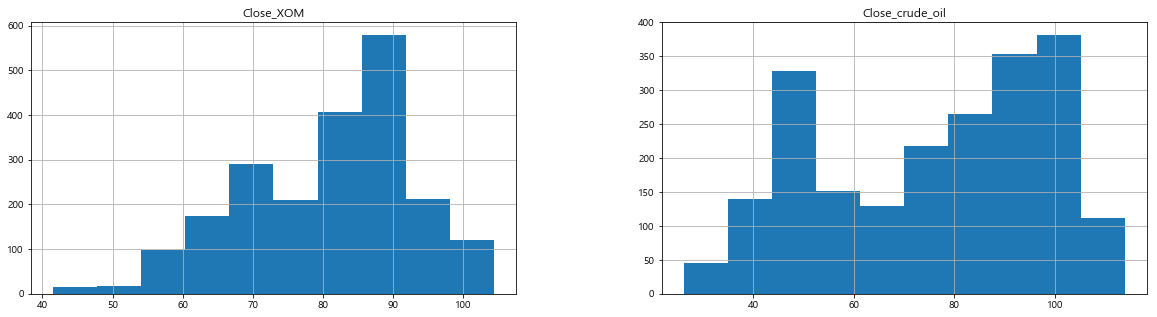

In [33]:
XOM_crude[['Close_XOM','Close_crude_oil']].loc[XOM_crude['party']=='민주당'].hist(figsize=(20,5))

In [34]:
XOM_crude[['Close_XOM','Close_crude_oil']].loc[XOM_crude['party']=='공화당'].describe()

,Close_XOM,Close_crude_oil
count,1494.000000,1494.000000
mean,74.293969,64.071412
std,15.071598,23.636909
min,31.450001,-37.630001
25%,71.362499,50.247501
50%,79.419998,58.450001
75%,83.007502,70.064999
max,95.050003,145.179993


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C157D89E8>,
      dtype=object)

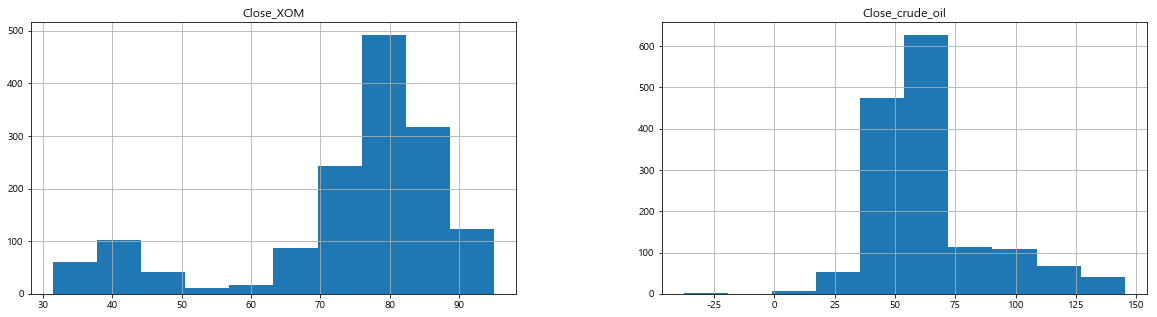

In [35]:
XOM_crude[['Close_XOM','Close_crude_oil']].loc[XOM_crude['party']=='공화당'].hist(figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C158CCE48>,
      dtype=object)

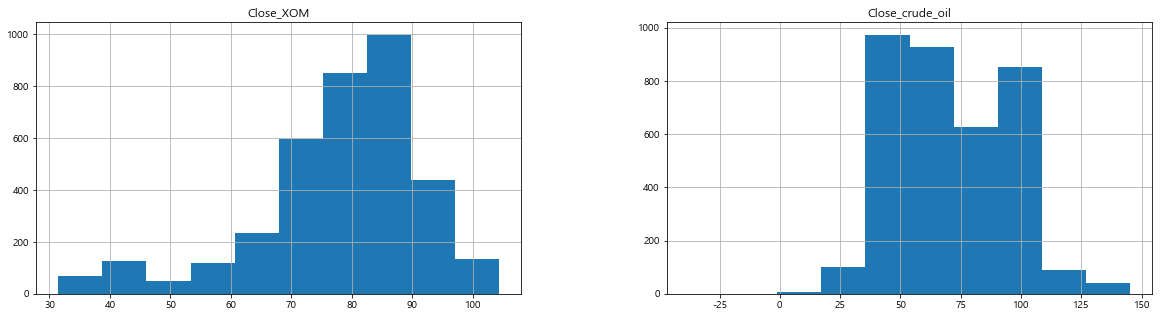

In [36]:
XOM_crude[['Close_XOM','Close_crude_oil']].hist(figsize=(20,5))

In [23]:
XOM_crude[['Close_XOM','Close_crude_oil']].loc[XOM_crude['party']=='민주당'].describe()

,Close_XOM,Close_crude_oil
count,2122.000000,2122.000000
mean,80.820481,75.882116
std,12.056137,22.309868
min,41.500000,26.209999
25%,71.632498,53.025001
50%,83.650002,80.505001
75%,89.160004,95.537500
max,104.379997,113.930000


In [32]:
#4.4 미국 집권정당별 연관성 분석

In [128]:
np.corrcoef(np.array(XOM_crude['Close_XOM'].loc[XOM_crude['party']=='민주당']),XOM_crude['Close_crude_oil'].loc[XOM_crude['party']=='민주당'])[0,1]

0.3194661775740141

In [134]:
stats.pearsonr(np.array(XOM_crude['Close_XOM'].loc[XOM_crude['party']=='민주당']),XOM_crude['Close_crude_oil'].loc[XOM_crude['party']=='민주당'])

(0.31946617757401385, 1.497507192125704e-51)

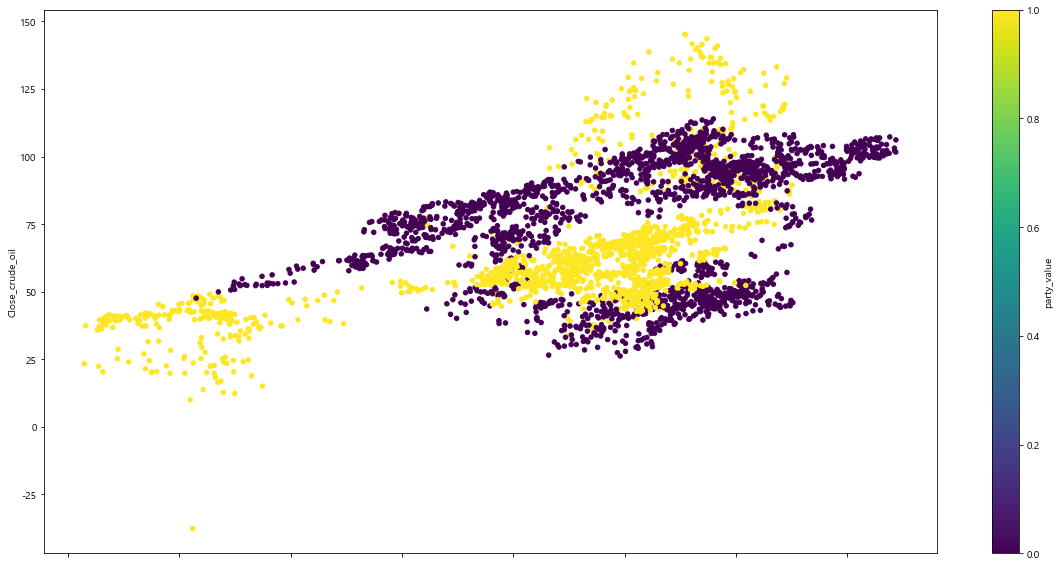

In [22]:
XOM_crude[['Close_XOM','Close_crude_oil','party_value']].plot.scatter(x='Close_XOM',y='Close_crude_oil',c='party_value',colormap='viridis',figsize = (20,10))

In [ ]:
#5. H1가설 데이터 저장

In [37]:
XOM_crude.to_csv('data/H1_data.csv')